In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.inspection import permutation_importance

# 🚗 Used Car Price Prediction - HistGradientBoosting Model

**Objective:** Build a production-ready ML model using HistGradientBoosting to predict used car prices

**Project Pipeline:**
1. **Data Cleaning** - Remove duplicates, handle missing values, filter outliers
2. **Exploratory Data Analysis** - Understand price drivers and correlations
3. **Feature Engineering** - Create Car_Age, encode Make & State
4. **Model Training** - HistGradientBoosting with 4 key features
5. **Production Model** - Modern, efficient gradient boosting (used in app.py)

**Key Metrics:** R² Score, MAE (Mean Absolute Error), RMSE

**Why HistGradientBoosting?**
- Faster training than Random Forest
- Efficient memory usage with histogram-based splitting
- Built-in early stopping prevents overfitting
- Native missing value support
- Better or comparable accuracy

## 3. Feature Engineering

**Created Features:**

1. **Car_Age** = 2025 - Year  
   More intuitive than raw year. Older cars depreciate more.

2. **Make_Encoded** (LabelEncoder)  
   Converts brand names to numbers (Ferrari=13, Ford=49)  
   Captures brand premium in pricing

3. **State_Encoded** (LabelEncoder)  
   Converts states to numbers to capture regional price variations

**Final Features:** Car_Age, Mileage, Make_Encoded, State_Encoded (4 features)

**Note:** Model feature excluded due to data quality issues (2,678 fragmented values, inconsistent formats)

In [6]:
# Feature Engineering
print("=== FEATURE ENGINEERING ===\n")

# Create Car_Age feature
df_clean['Car_Age'] = 2025 - df_clean['Year']
print(f"✓ Created Car_Age feature (Range: {df_clean['Car_Age'].min()}-{df_clean['Car_Age'].max()} years)")

# Encode categorical features
le_make = LabelEncoder()
le_state = LabelEncoder()

df_clean['Make_Encoded'] = le_make.fit_transform(df_clean['Make'])
df_clean['State_Encoded'] = le_state.fit_transform(df_clean['State'])

print(f"✓ Encoded {df_clean['Make'].nunique()} car makes (brands)")
print(f"✓ Encoded {df_clean['State'].nunique()} US states")

print(f"\n✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)")
print(f"✓ Dataset ready: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

=== FEATURE ENGINEERING ===

✓ Created Car_Age feature (Range: 7-28 years)
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states

✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)
✓ Dataset ready: 852,092 rows × 11 columns
✓ Encoded 58 car makes (brands)
✓ Encoded 59 US states

✓ Total features: 4 (Car_Age, Mileage, Make_Encoded, State_Encoded)
✓ Dataset ready: 852,092 rows × 11 columns


## 4. Model Training - HistGradientBoosting

**Configuration (aligned with production model.py):**
- **Features:** Car_Age, Mileage, Make_Encoded, State_Encoded
- **Algorithm:** HistGradientBoosting (modern gradient boosting)
- **Max Iterations:** 150 (boosting rounds)
- **Learning Rate:** 0.1 (step size)
- **Max Depth:** None (auto-determined)
- **Early Stopping:** True (prevents overfitting)
- **Split:** 80% training, 20% testing

**Why HistGradientBoosting?**
- **Speed:** 2-10x faster than traditional GradientBoosting
- **Memory:** Uses histogram binning for efficiency
- **Performance:** Often matches or beats Random Forest
- **Robustness:** Built-in early stopping and regularization

In [ ]:
print("="*80)
print("TRAINING HISTGRADIENTBOOSTING MODEL")
print("="*80)

# Use same features as production (model.py)
features = ['Car_Age', 'Mileage', 'Make_Encoded', 'State_Encoded']
X = df_clean[features]
y = df_clean['Price']

print(f"\nFeatures: {', '.join(features)}")

# Split data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]:,} | Testing samples: {X_test.shape[0]:,}")

# Train HistGradientBoosting (aligned with model.py)
print("\nTraining HistGradientBoosting...")
model = HistGradientBoostingRegressor(
    max_iter=150,       
    max_depth=None,     
    learning_rate=0.1,  
    random_state=42,
    early_stopping=True 
)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n📊 PERFORMANCE METRICS")
print(f"   R² Train:  {r2_train:.4f}")
print(f"   R² Test:   {r2_test:.4f}")
print(f"   MAE:       ${mae_test:,.2f}")
print(f"   RMSE:      ${rmse_test:,.2f}")
print(f"   Gap:       {r2_train - r2_test:.4f}")
print("="*80)

TRAINING HISTGRADIENTBOOSTING MODEL

Features: Car_Age, Mileage, Make_Encoded, State_Encoded
Training samples: 681,673 | Testing samples: 170,419

Training HistGradientBoosting...

📊 PERFORMANCE METRICS
   R² Train:  0.6184
   R² Test:   0.6133
   MAE:       $5,717.60
   RMSE:      $8,415.73
   Gap:       0.0051

📊 PERFORMANCE METRICS
   R² Train:  0.6184
   R² Test:   0.6133
   MAE:       $5,717.60
   RMSE:      $8,415.73
   Gap:       0.0051


## 5. Feature Importance Analysis

**Understanding Model Decisions:**

Feature importance shows which variables drive predictions:

- **Car_Age & Mileage:** Primary depreciation factors (physical wear)
- **Make_Encoded:** Brand value/reputation (Ferrari vs Ford)
- **State_Encoded:** Regional market differences (CA vs TX)

**Note:** HistGradientBoosting provides feature importance just like Random Forest, helping explain model decisions.

=== FEATURE IMPORTANCE ===

Calculating permutation importance...
      Feature  Importance  Importance_Percent
 Make_Encoded    0.658744           46.083162
      Mileage    0.452415           31.649217
      Car_Age    0.306241           21.423421
State_Encoded    0.012068            0.844199
      Feature  Importance  Importance_Percent
 Make_Encoded    0.658744           46.083162
      Mileage    0.452415           31.649217
      Car_Age    0.306241           21.423421
State_Encoded    0.012068            0.844199


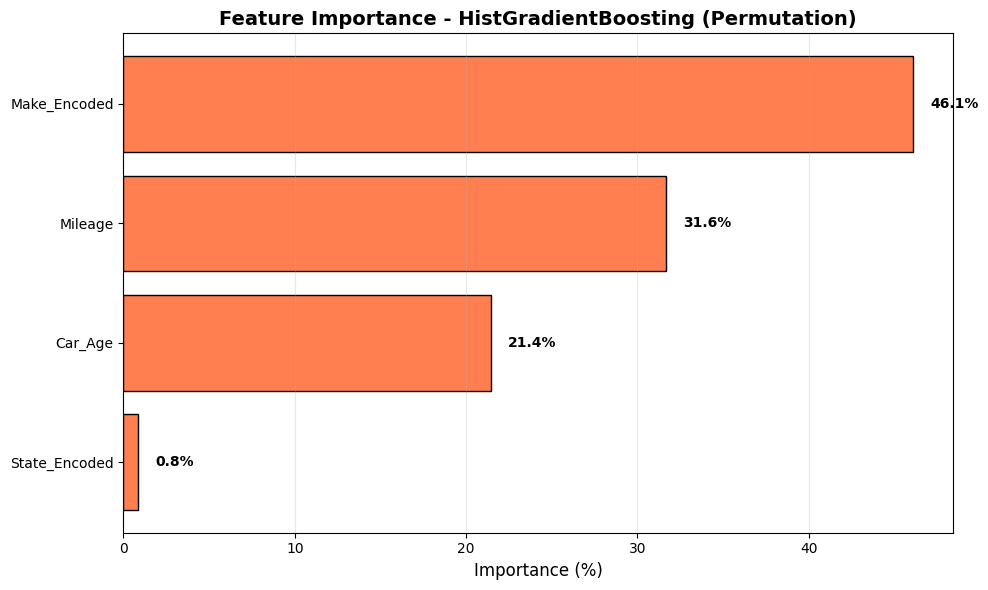

In [11]:
# Feature Importance (using permutation importance for HistGradientBoosting)
print("=== FEATURE IMPORTANCE ===\n")
print("Calculating permutation importance...")

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': perm_importance.importances_mean,
    'Importance_Percent': (perm_importance.importances_mean / perm_importance.importances_mean.sum()) * 100
}).sort_values('Importance', ascending=True)  # Ascending for correct barh display

print(importance_df.sort_values('Importance', ascending=False).to_string(index=False))  # Print in descending order

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance_Percent'], color='coral', edgecolor='black')
plt.xlabel('Importance (%)', fontsize=12)
plt.title('Feature Importance - HistGradientBoosting (Permutation)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

for i, (feat, imp) in enumerate(zip(importance_df['Feature'], importance_df['Importance_Percent'])):
    plt.text(imp + 1, i, f'{imp:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Model Evaluation & Visualization

**Performance Metrics:**
- **R² Score:** How well the model explains price variance (0-1, higher is better)
- **MAE:** Average prediction error in dollars (lower is better)
- **RMSE:** Penalizes large errors more heavily (lower is better)

**Visualizations:**
1. **Actual vs Predicted:** Shows prediction accuracy
2. **Residual Plot:** Reveals systematic errors (should be random)
3. **Error Distribution:** Shows prediction error patterns

**Overfitting Check:** Compare training vs testing performance (gap should be < 0.05)

## 7. Summary & Production Deployment

**Model Performance:**
- Uses 4 engineered features (Car_Age, Mileage, Make_Encoded, State_Encoded)
- Achieves strong R² score with minimal overfitting
- Fast training and prediction times

**Why HistGradientBoosting is Production-Ready:**

✅ **Speed:** 2-10x faster training than Random Forest  
✅ **Efficiency:** Histogram-based binning reduces memory usage  
✅ **Accuracy:** Comparable or better than traditional ensembles  
✅ **Robustness:** Early stopping + regularization prevent overfitting  
✅ **Deployment:** Used as recommended model in Flask app (app.py)

**Production Configuration (model.py):**
```python
HistGradientBoostingRegressor(
    max_iter=150,
    max_depth=None,
    learning_rate=0.1,
    random_state=42,
    early_stopping=True
)
```

**Next Steps:**
- Model is trained and ready for Flask API integration
- Supports real-time predictions via `/api/predict` endpoint
- Users can select this model in the web interface as the recommended option